# Reinforcement Learning

Environment: [CartPole-v1](http://gym.openai.com/envs/CartPole-v1/)

In [5]:
import gym
import numpy as np
import random

import matplotlib.pyplot as plt

CART_POLE   = 'CartPole-v1'

# Convert to discrete state space
bin_size    = 20
bins        = [np.linspace(-4.8,4.8,bin_size),
                np.linspace(-4,4,bin_size),
                np.linspace(-0.418,0.418,bin_size),
                np.linspace(-4,4,bin_size)]

def discrete(state):
    discrete_state = []
    for i in range(len(state)):
       discrete_state.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(discrete_state)

def action_probability(nA, epsilon, best):
    prob = np.ones(nA)*epsilon/nA
    prob[best] += (1-epsilon)
    return prob

def Q_learning(env, step_size=0.9, episodes=50000, gamma=1, epsilon=0.1):
    Q = np.zeros([bin_size]*len(bins) + [env.action_space.n])

    reward_list = []

    for episode in range(episodes):
        state = discrete(env.reset())

        episode_reward  = 0
        done = False

        while not done:
            # Select action (epsilon greedy)
            prob = action_probability(env.action_space.n, epsilon, np.argmax(Q[state]))
            action = env.action_space.sample() if random.uniform(0,1)<epsilon else np.random.choice(np.arange(env.action_space.n), p=prob)

            # Take action
            next_state, reward, done, info = env.step(action)
            next_state = discrete(next_state)
            
            # Calculate
            q_value = Q[state+(action,)]
            max_value = np.max(Q[next_state])
            new_q_value = q_value + step_size * (reward + (gamma * max_value) - q_value)

            # Update Q
            Q[state+(action,)] = new_q_value
            
            state = next_state
            episode_reward += reward
        
        reward_list.append(episode_reward)
        
    plt.plot(np.arange(episodes), reward_list)
    plt.ylim(0, 520)
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Training reuslt for step size = {}".format(step_size))
    plt.show()

    print("Average reward of training: {}".format(np.mean(np.array(reward_list))))

    return Q, np.mean(np.array(reward_list))

def Sarsa(env, step_size=0.9, episodes=50000, gamma=1, epsilon=0.1):
    Q = np.zeros([bin_size]*len(bins) + [env.action_space.n])

    reward_list = []

    for episode in range(episodes):
        state = discrete(env.reset())

        episode_reward  = 0
        done = False

        # Select action (epsilon greedy)
        prob = action_probability(env.action_space.n, epsilon, np.argmax(Q[state]))
        action = env.action_space.sample() if random.uniform(0,1)<epsilon else np.random.choice(np.arange(env.action_space.n), p=prob)

        while not done:
            # Take action
            next_state, reward, done, info = env.step(action)
            next_state = discrete(next_state)

            # Select action (epsilon greedy)
            prob = action_probability(env.action_space.n, epsilon, np.argmax(Q[next_state]))
            next_action = env.action_space.sample() if random.uniform(0,1)<epsilon else np.random.choice(np.arange(env.action_space.n), p=prob)

            # Calculate
            q_value = Q[state+(action,)]
            next_q = Q[next_state+(next_action,)]
            new_q_value = q_value + step_size * (reward + (gamma * next_q) - q_value)

            # Update Q
            Q[state+(action,)] = new_q_value
            
            state = next_state
            action = next_action
            episode_reward += reward

        reward_list.append(episode_reward)
    
    plt.plot(np.arange(episodes), reward_list)
    plt.ylim(0, 520)
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Training reuslt for step size = {}".format(step_size))
    plt.show()

    print("Average reward of training: {}".format(np.mean(np.array(reward_list))))

    return Q, np.mean(np.array(reward_list))


def determine_policy_from_Q(Q):
    opt_p = np.zeros([bin_size] * 4)
    for i in range(len(Q)):
        for j in range(len(Q[i])):
            for k in range(len(Q[i][j])):
                for m in range(len(Q[i][j][k])):
                    opt_p[i][j][k][m] = np.argmax(Q[i][j][k][m])
                    
    return opt_p.astype(int)



def test_policy(env, policy):

    stochastic_policy = False
    
    # if policy.shape == (env.nS, env.nA):
    #     stochastic_policy = True    
    
    total_reward = 0
    steps = 0
    done = False
    state = discrete(env.reset())

    while ((not done)):
        # env.render()
        
        if stochastic_policy:
            action = np.random.choice(int(env.nA), p=policy[state])
            print("Selecting action: {} with probability: {}".format(action, policy[state][action]))
        else:
            action = policy[state]
        
        next_state, reward, done, _ = env.step(int(action))
        total_reward += reward
        state = discrete(next_state)
        steps+=1
    
    # print("Test {}, reward = {}".format(steps, total_reward))
    return total_reward




def main():
    
    env = gym.make(CART_POLE) #Select environment
    env.reset() # Initialise env
    
    # Q = Q_learning(env)               # Get Q value for Q-learning
    Q = Sarsa(env)                      # Get Q value for Sarsa
    opt_p = determine_policy_from_Q(Q)  # Get policy from  Q
    
    cnt = 0
    test_cnt  = 100
    reward_list = []
    for _ in range(test_cnt): # Test the policy test_cnt times
        reward = test_policy(env, opt_p) # Test the policy.
        reward_list.append(reward)
            
    # print("Success  rate: {}".format(cnt/test_cnt))
    print("Average reward of testing: {}".format(np.mean(np.array(reward_list))))
    
    env.close()

In [6]:
def plot_graph(reward_list, x_axis, title):
    reward_list = [np.mean(np.array(rewards)) for rewards in reward_list]
    plt.plot(x_axis, reward_list)
    plt.xticks(x_axis)
    plt.ylim(0, 520)
    plt.title(title)
    plt.show()
    return

Train Q Learning with 50000 episodes

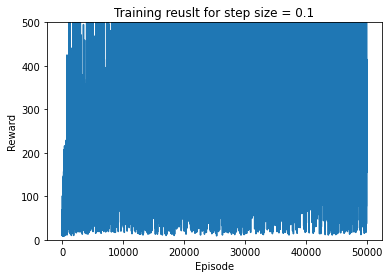

Average reward of training: 268.43982
Average reward of testing: 391.615


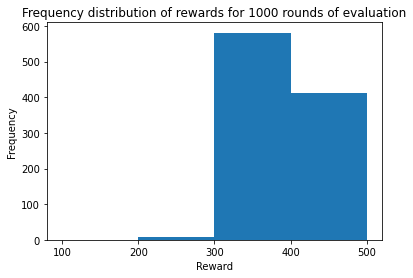

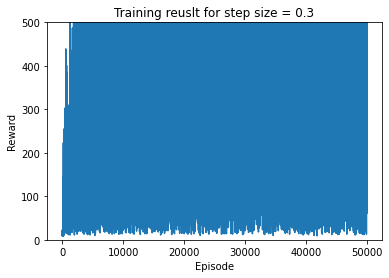

Average reward of training: 328.12642
Average reward of testing: 485.212


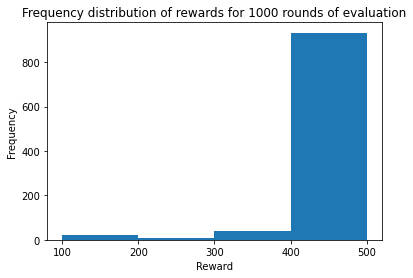

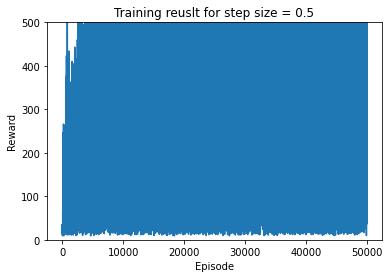

Average reward of training: 225.39734
Average reward of testing: 483.184


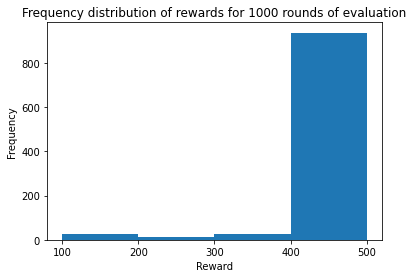

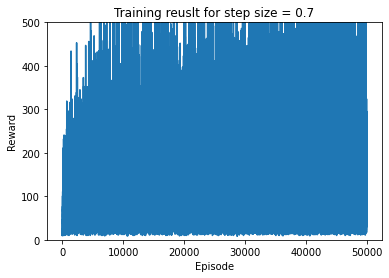

Average reward of training: 135.83098
Average reward of testing: 377.24


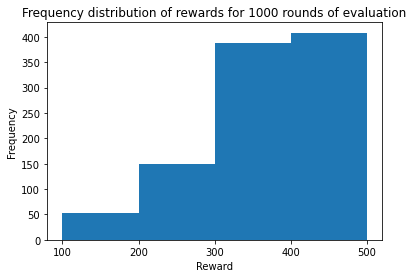

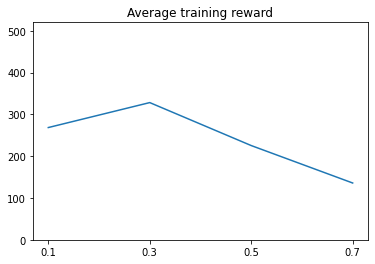

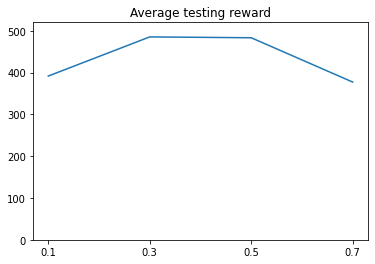

In [9]:
env = gym.make(CART_POLE) #Select environment
env.reset() # Initialise env

reward_list_training    = []
reward_list             = []
alpha_list              = [0.1, 0.3, 0.5, 0.7]
for alpha in alpha_list:
    Q, training_reward = Q_learning(env, step_size=alpha)               # Get Q value for Q-learning
    # Q = Sarsa(env)                      # Get Q value for Sarsa
    opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

    cnt = 0
    test_cnt  = 1000
    rewards = []
    for _ in range(test_cnt): # Test the policy test_cnt times
        reward = test_policy(env, opt_p) # Test the policy.
        rewards.append(reward)
    
    reward_list.append(rewards)
    reward_list_training.append(training_reward)
        
    print("Average reward of testing: {}".format(np.mean(np.array(rewards))))

    plt.hist(rewards, bins=[100,200,300,400,500])
    plt.xticks([100,200,300,400,500])
    plt.xlabel("Reward")
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of rewards for 1000 rounds of evaluation")
    plt.show()
# print(opt_p)

env.close()

plot_graph(reward_list_training, alpha_list, "Average training reward")
plot_graph(reward_list, alpha_list, "Average testing reward")

Train Q Learning with 25000 episodes

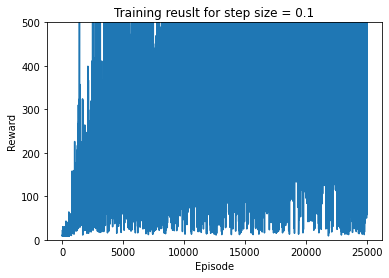

Average reward of training: 259.71656
Average reward of testing: 488.473


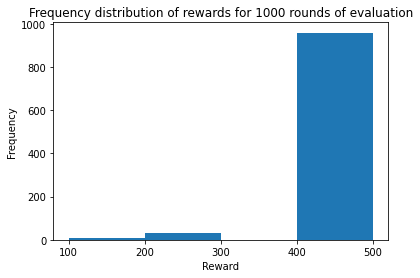

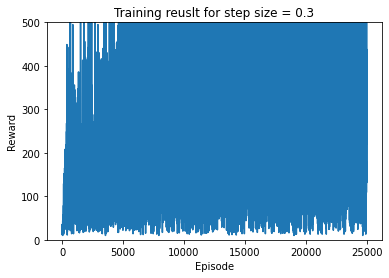

Average reward of training: 267.39248
Average reward of testing: 353.43


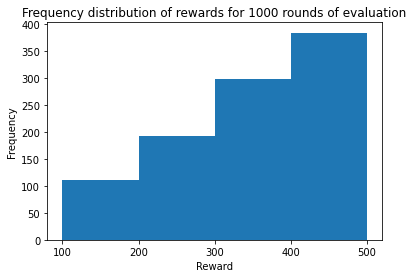

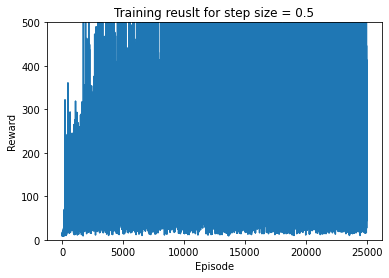

Average reward of training: 191.939
Average reward of testing: 451.193


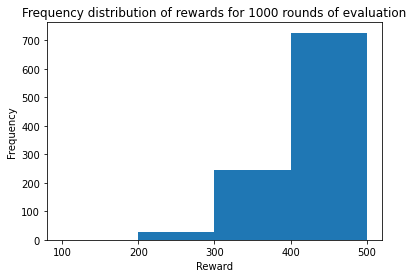

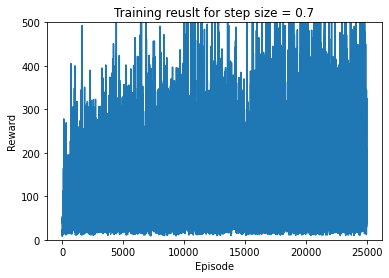

Average reward of training: 123.59884
Average reward of testing: 251.34


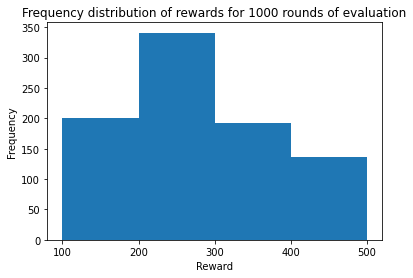

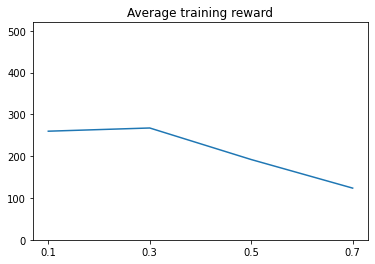

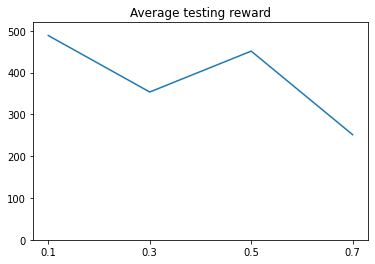

In [7]:
env = gym.make(CART_POLE) #Select environment
env.reset() # Initialise env

reward_list_training    = []
reward_list             = []
alpha_list              = [0.1, 0.3, 0.5, 0.7]
for alpha in alpha_list:
    Q, training_reward = Q_learning(env, episodes=25000, step_size=alpha)               # Get Q value for Q-learning
    # Q = Sarsa(env)                      # Get Q value for Sarsa
    opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

    cnt = 0
    test_cnt  = 1000
    rewards = []
    for _ in range(test_cnt): # Test the policy test_cnt times
        reward = test_policy(env, opt_p) # Test the policy.
        rewards.append(reward)
    
    reward_list.append(rewards)
    reward_list_training.append(training_reward)
        
    print("Average reward of testing: {}".format(np.mean(np.array(rewards))))

    plt.hist(rewards, bins=[100,200,300,400,500])
    plt.xticks([100,200,300,400,500])
    plt.xlabel("Reward")
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of rewards for 1000 rounds of evaluation")
    plt.show()
# print(opt_p)

env.close()

plot_graph(reward_list_training, alpha_list, "Average training reward")
plot_graph(reward_list, alpha_list, "Average testing reward")

Train SARSA with 50000 episodes

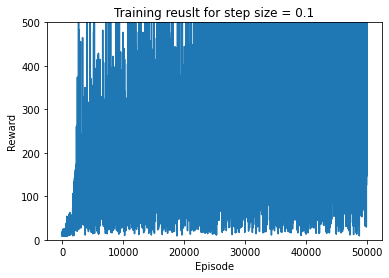

Average reward of training: 219.63512
Average reward of testing: 205.689


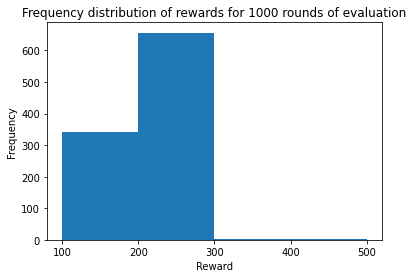

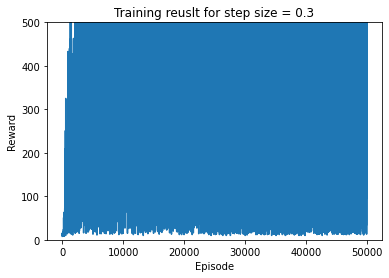

Average reward of training: 289.45452
Average reward of testing: 491.876


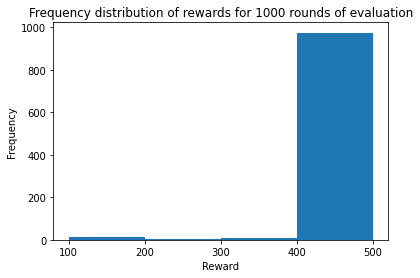

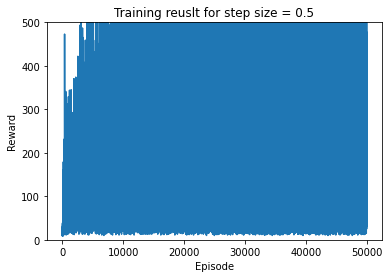

Average reward of training: 208.4558
Average reward of testing: 427.813


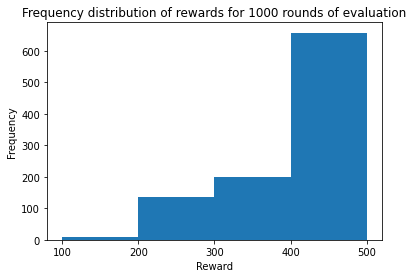

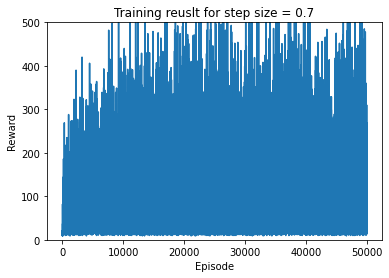

Average reward of training: 104.54694
Average reward of testing: 204.316


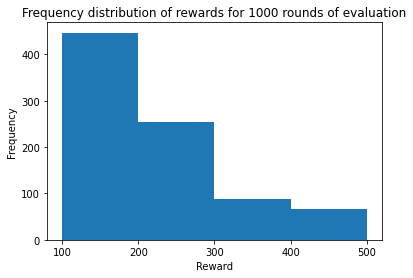

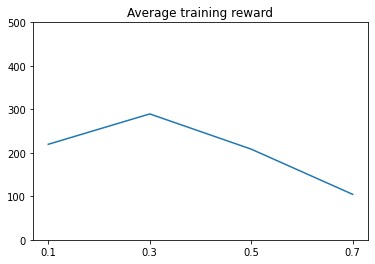

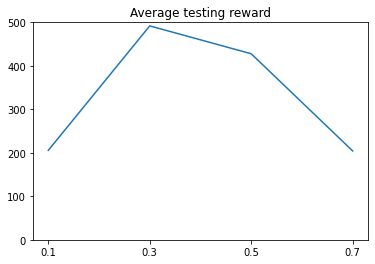

In [ ]:
env = gym.make(CART_POLE) #Select environment
env.reset() # Initialise env

reward_list_training    = []
reward_list             = []
alpha_list              = [0.1, 0.3, 0.5, 0.7]
for alpha in alpha_list:
    # Q, training_reward = Q_learning(env, step_size=alpha)               # Get Q value for Q-learning
    Q, training_reward = Sarsa(env, step_size=alpha)                      # Get Q value for Sarsa
    opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

    cnt = 0
    test_cnt  = 1000
    rewards = []
    for _ in range(test_cnt): # Test the policy test_cnt times
        reward = test_policy(env, opt_p) # Test the policy.
        rewards.append(reward)
    
    reward_list.append(rewards)
    reward_list_training.append(training_reward)
        
    print("Average reward of testing: {}".format(np.mean(np.array(rewards))))

    plt.hist(rewards, bins=[100,200,300,400,500])
    plt.xticks([100,200,300,400,500])
    plt.xlabel("Reward")
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of rewards for 1000 rounds of evaluation")
    plt.show()
# print(opt_p)

env.close()

plot_graph(reward_list_training, alpha_list, "Average training reward")
plot_graph(reward_list, alpha_list, "Average testing reward")

Train SARSA with 25000 episodes

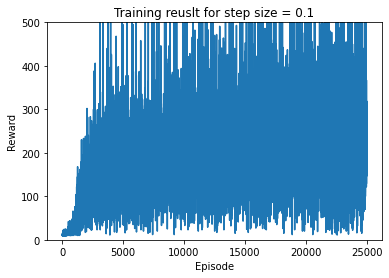

Average reward of training: 176.75244
Average reward of testing: 241.673


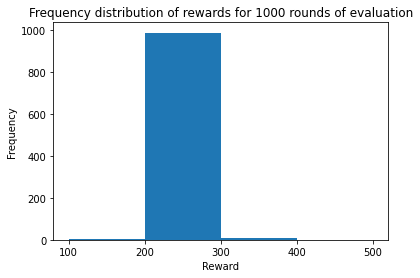

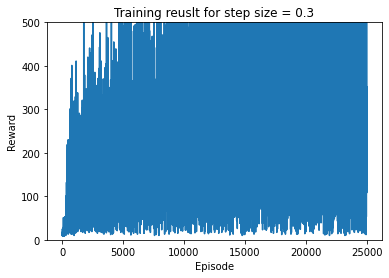

Average reward of training: 236.88176
Average reward of testing: 250.932


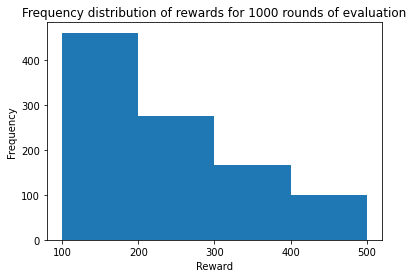

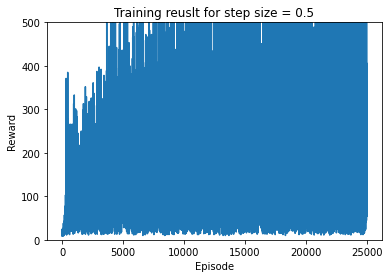

Average reward of training: 182.50324
Average reward of testing: 247.64


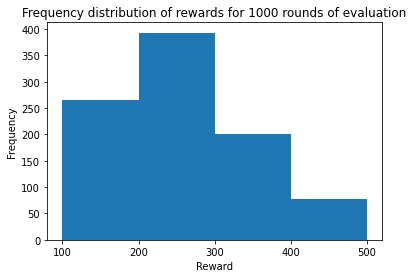

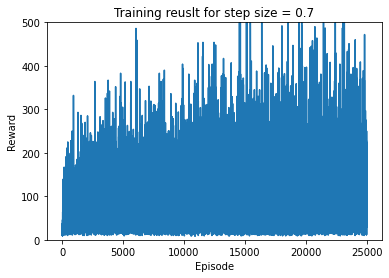

Average reward of training: 95.36824
Average reward of testing: 97.003


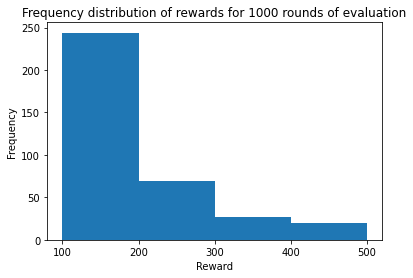

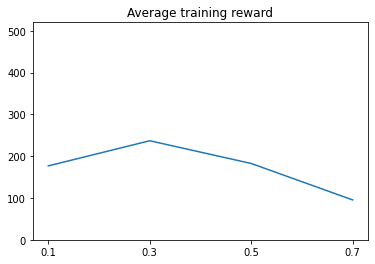

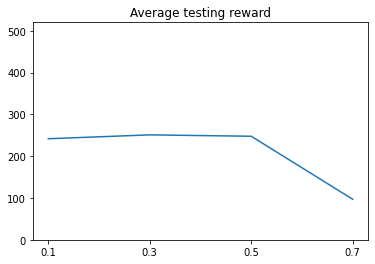

In [ ]:
env = gym.make(CART_POLE) #Select environment
env.reset() # Initialise env

reward_list_training    = []
reward_list             = []
alpha_list              = [0.1, 0.3, 0.5, 0.7]
for alpha in alpha_list:
    # Q, training_reward = Q_learning(env, step_size=alpha)               # Get Q value for Q-learning
    Q, training_reward = Sarsa(env, episodes=25000, step_size=alpha)                      # Get Q value for Sarsa
    opt_p = determine_policy_from_Q(Q)  # Get policy from  Q

    cnt = 0
    test_cnt  = 1000
    rewards = []
    for _ in range(test_cnt): # Test the policy test_cnt times
        reward = test_policy(env, opt_p) # Test the policy.
        rewards.append(reward)
    
    reward_list.append(rewards)
    reward_list_training.append(training_reward)
        
    print("Average reward of testing: {}".format(np.mean(np.array(rewards))))

    plt.hist(rewards, bins=[100,200,300,400,500])
    plt.xticks([100,200,300,400,500])
    plt.xlabel("Reward")
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of rewards for 1000 rounds of evaluation")
    plt.show()
# print(opt_p)

env.close()

plot_graph(reward_list_training, alpha_list, "Average training reward")
plot_graph(reward_list, alpha_list, "Average testing reward")